In [ ]:
#importamos las librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importamos el dataseet de 100 datos
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [9]:
# Estraemos de la tabla la columna 3 y 4 
X = df.iloc[:, [3, 4]].values

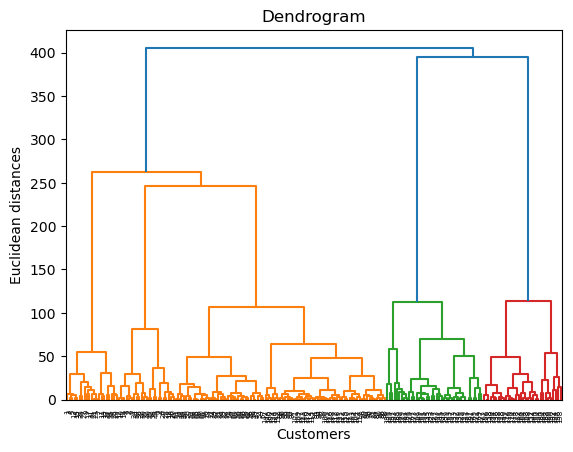

In [11]:
# Importamos el agrupemiento jerarquico desde la libreria scipy para crear el dendograma
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [17]:
# Usamos e agrupamiento aglomeraitvo como parametro será la distancia euclideana de acuerdo a creiterio 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
#Se asigna todos los puntos a un solo grupo, para su final agrupamiento 
y_hc = hc.fit_predict(X)

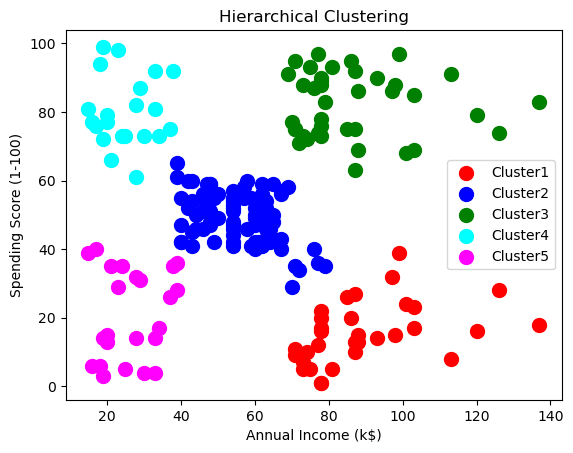

In [19]:
# Grafico de resultados mostrando por cada grupo los puntos correspondiente con sus distancias 
#Se agrega el color a cada grupo de acuerdo a su grupo final y agrupado conforme el algoritmo
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()